# **Country Development Classification Using Hierarchical Clustering**

### Objective

The country dataset includes socio-economic and health indicators such as **child mortality, exports, health expenditure, income, inflation, life expectancy, fertility rates, and GDP per capita**. The objective is to categorize the countries into **three clusters**: Developed, Developing, and Least Developed.

### Approach

To achieve this, we will employ an **unsupervised learning approach**, specifically clustering algorithms. This method will help identify patterns and group countries based on similar socio-economic and health profiles. By analyzing these clusters, we can gain insights into the factors that differentiate countries at various stages of development, enabling targeted policy interventions and resource allocation.



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/iamnaveen1401/Datasets/refs/heads/main/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [4]:
df[df['country'] == 'India']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,1350


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
X = df.drop(['country'], axis=1)
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


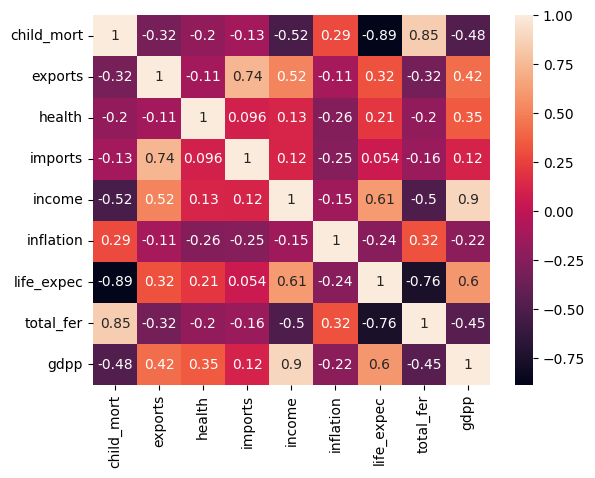

In [7]:
sns.heatmap(X.corr(), annot=True)
plt.show()

### Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Array to DataFrame

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


### Dendrogram - Vissualizing Hierarchical Clustering

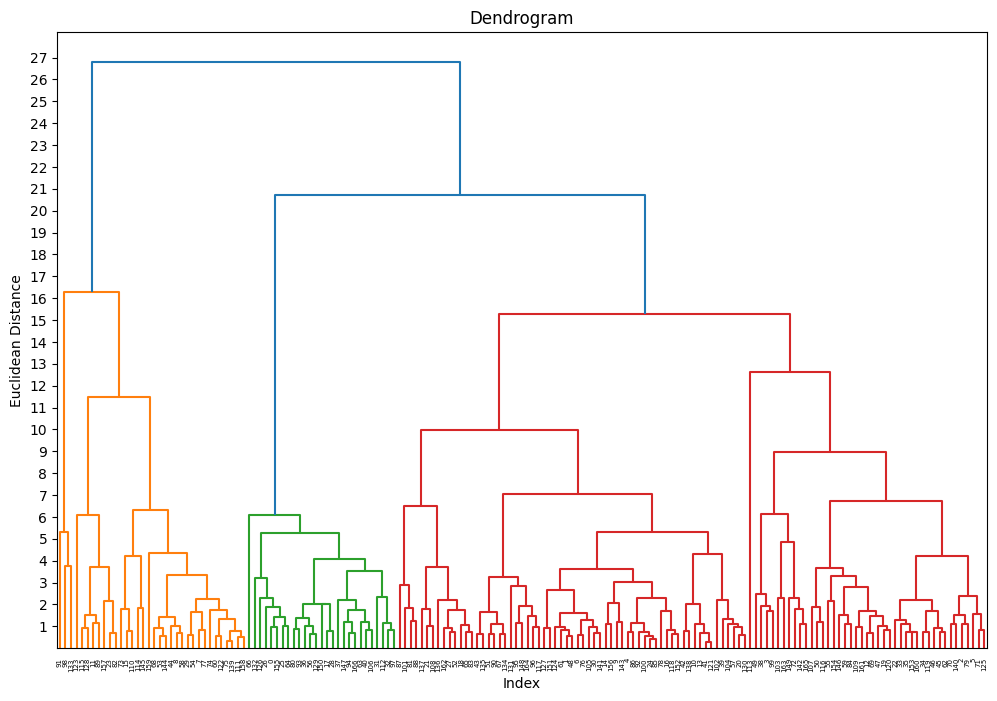

In [9]:
from scipy.cluster import hierarchy

plt.figure(figsize=(12,8))
# Plot dendrogram
linkage = hierarchy.linkage(X_scaled, method='ward')
dendrogram = hierarchy.dendrogram(linkage)

plt.title("Dendrogram")
plt.xlabel('Index')
plt.ylabel("Euclidean Distance")
plt.yticks(range(1,28))
plt.show()


### Agglomerative Clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering

ahc_model = AgglomerativeClustering(n_clusters=3)
cluster_label_fit = ahc_model.fit_predict(X_scaled)
cluster_label = ahc_model.labels_

In [11]:
from sklearn.metrics import silhouette_score

Sil_score = silhouette_score(X_scaled,cluster_label)
Sil_score

np.float64(0.24563001303300652)

In [12]:
df['Cluster'] = cluster_label_fit
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1


In [13]:
df['Cluster'].unique()

array([2, 1, 0])

In [14]:
df['Cluster'].value_counts()

Cluster
1    106
0     34
2     27
Name: count, dtype: int64

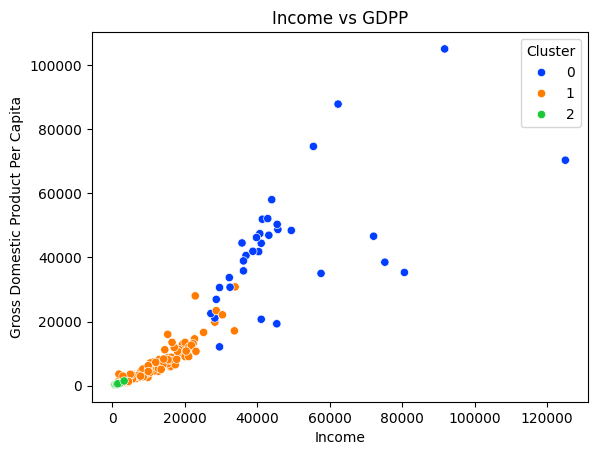

In [15]:
# Visualizing hcluster
sns.scatterplot(x='income', y='gdpp', hue='Cluster', data=df, palette='bright')
plt.title("Income vs GDPP")
plt.xlabel("Income")
plt.ylabel("Gross Domestic Product Per Capita")
plt.show()

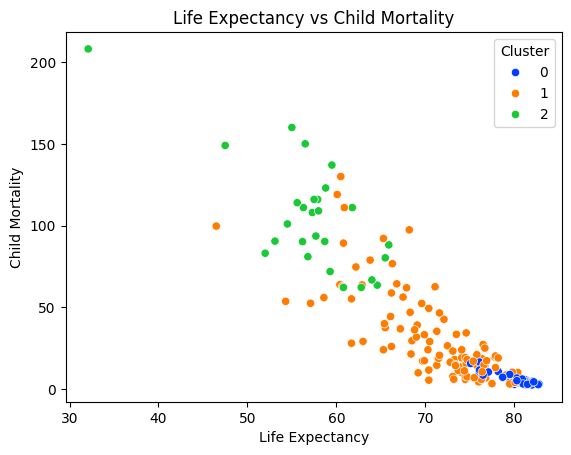

In [16]:

sns.scatterplot(x='life_expec', y='child_mort', hue='Cluster', data=df, palette='bright')
plt.title("Life Expectancy vs Child Mortality")
plt.xlabel("Life Expectancy")
plt.ylabel("Child Mortality")
plt.show()

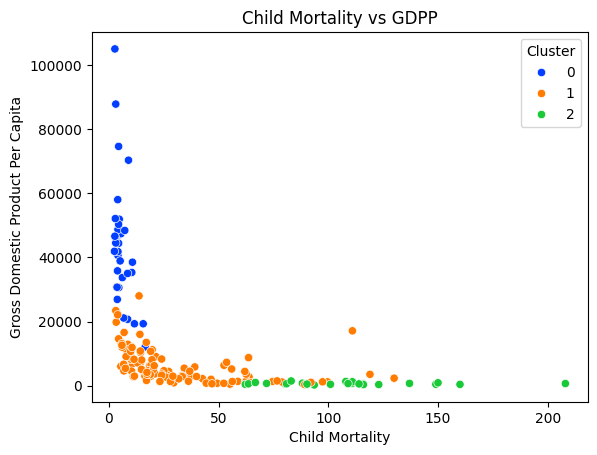

In [17]:

sns.scatterplot(x='child_mort', y='gdpp', hue='Cluster', data=df, palette='bright')
plt.title("Child Mortality vs GDPP")
plt.ylabel("Gross Domestic Product Per Capita")
plt.xlabel("Child Mortality")
plt.show()

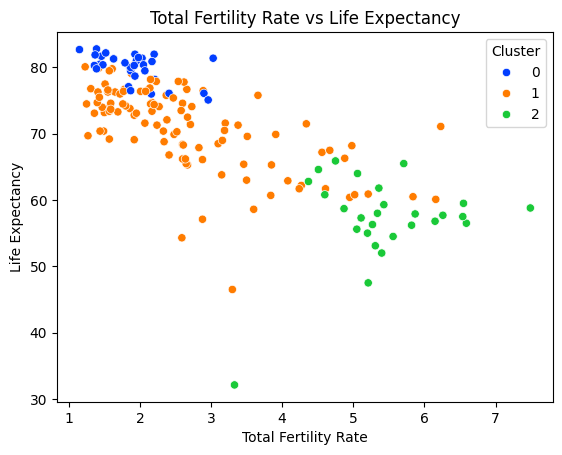

In [18]:
sns.scatterplot(x='total_fer', y='life_expec', hue='Cluster', data=df, palette='bright')
plt.title("Total Fertility Rate vs Life Expectancy")
plt.xlabel("Total Fertility Rate")
plt.ylabel("Life Expectancy")
plt.show()

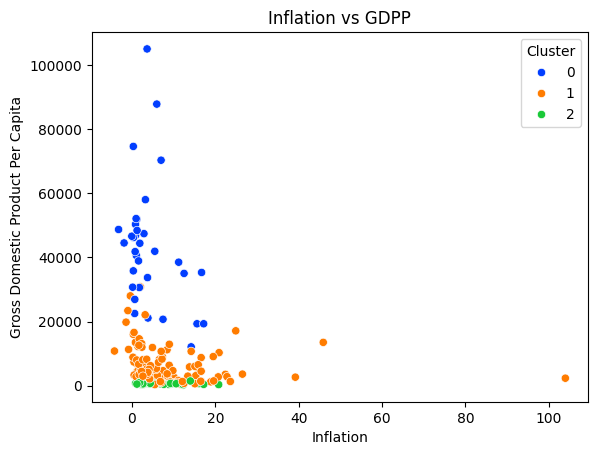

In [19]:
sns.scatterplot(x='inflation', y='gdpp', hue='Cluster', data=df, palette='bright')
plt.title("Inflation vs GDPP")
plt.xlabel("Inflation")
plt.ylabel("Gross Domestic Product Per Capita")
plt.show()

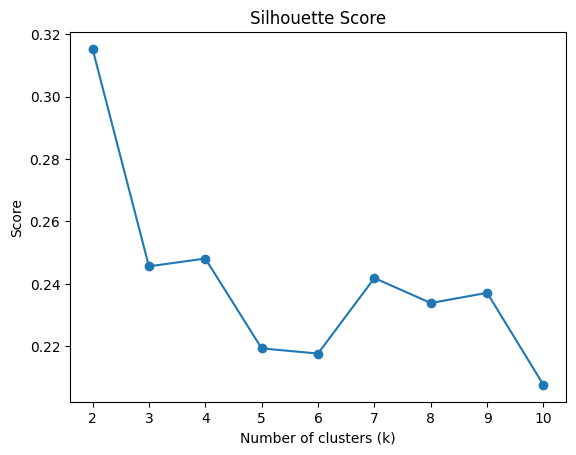

In [20]:
# Just Try - Not Recommended
# Use diffent n_clusters values to find each sil score
Sil_scores = []

for n in range(2,11):
    ahc_model = AgglomerativeClustering(n_clusters=n)
    cluster_label_fit = ahc_model.fit_predict(X_scaled)
    Sil_score = silhouette_score(X_scaled,cluster_label_fit)
    Sil_scores.append(Sil_score)

# Silhouette Scores
plt.plot(range(2,11), Sil_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Score')
plt.show()

In [21]:
Sil_scores

[np.float64(0.3153134331018189),
 np.float64(0.24563001303300652),
 np.float64(0.24811891847692066),
 np.float64(0.2193301598939687),
 np.float64(0.217674980548791),
 np.float64(0.24187376443876954),
 np.float64(0.23387000967791902),
 np.float64(0.23713495817822783),
 np.float64(0.20762024216667316)]

In [22]:
# Using Kmeans - just try - Not Recommended
from sklearn.cluster import KMeans
wcss = []
K_values = range(2,11)

for k in K_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

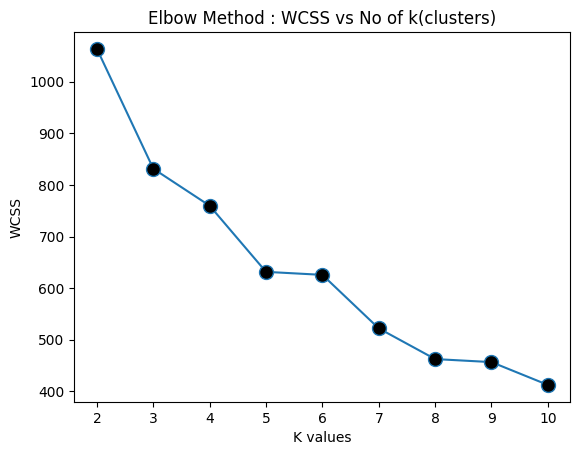

In [23]:
plt.plot(K_values, wcss, marker='o', markersize=10, markerfacecolor='k')
plt.title("Elbow Method : WCSS vs No of k(clusters)")
plt.xlabel("K values")
plt.ylabel("WCSS")
plt.xticks(K_values)
plt.show()

## Final Cluster Labeling

Based on the analysis from the various graphs, we can confidently categorize the clusters as follows:

* **Cluster 0 (Blue): Developed Countries**
    * These countries exhibit **high income**, **high GDPP**, **low child mortality**, **high life expectancy**, and **low inflation**.
    * The economic strength and better health outcomes in this cluster indicate that these are **Developed Countries**.

* **Cluster 1 (Orange): Developing Countries**
    * Countries in this cluster have **moderate income**, **moderate GDPP**, **moderate child mortality**, **moderate life expectancy**, and **moderate inflation**.
    * They are progressing towards economic and health improvements, making them **Developing Countries**.

* **Cluster 2 (Green): Least Developed Countries**
    * This cluster is characterized by **low income**, **low GDPP**, **high child mortality**, **low life expectancy**, and **high fertility rates**.
    * The indicators of poor economic and health conditions suggest that these are **Least Developed Countries**.

## Conclusion:

Based on the hierarchical clustering and the patterns observed in the visualizations, we have labeled the clusters as follows:

* Cluster 0: **Developed Countries**
* Cluster 1: **Developing Countries**
* Cluster 2: **Least Developed Countries**

In [24]:
df.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1


In [25]:
df['Cluster'] = df['Cluster'].replace({0:'Developed Countries',1:'Developing Countries',
                                     2:'Least Developed Countries'})
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Least Developed Countries
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing Countries
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing Countries
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Developing Countries
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing Countries


In [26]:
df[df['country'] == 'India']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,1350,Developing Countries


In [27]:
Developed_Countries = df[df['Cluster']=='Developed Countries']
Developed_Countries['country']

7                 Australia
8                   Austria
11                  Bahrain
15                  Belgium
23                   Brunei
29                   Canada
44                  Denmark
53                  Finland
54                   France
58                  Germany
60                   Greece
68                  Iceland
73                  Ireland
74                   Israel
75                    Italy
77                    Japan
82                   Kuwait
89                    Libya
91               Luxembourg
98                    Malta
110             Netherlands
111             New Zealand
114                  Norway
115                    Oman
122                Portugal
123                   Qatar
128            Saudi Arabia
133               Singapore
139                   Spain
144                  Sweden
145             Switzerland
157    United Arab Emirates
158          United Kingdom
159           United States
Name: country, dtype: object